<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/Clustering_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
Univ = pd.read_csv("/content/Universities.csv")

In [3]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [9]:
Univ.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT,25.0,1266.44,108.359771,1005.0,1240.0,1285.0,1340.0,1415.0
Top10,25.0,76.48,19.433905,28.0,74.0,81.0,90.0,100.0
Accept,25.0,39.20,19.727308,14.0,24.0,36.0,50.0,90.0
SFRatio,25.0,12.72,4.067350,6.0,11.0,12.0,14.0,25.0
Expenses,25.0,27388.00,14424.883165,8704.0,15140.0,27553.0,34870.0,63575.0
GradRate,25.0,86.72,9.057778,67.0,81.0,90.0,94.0,97.0


In [2]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [10]:
df_norm = norm_func(Univ.iloc[:,1:])

In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
type(df_norm)

pandas.core.frame.DataFrame

In [15]:
z = linkage(df_norm, method="complete",metric="euclidean")

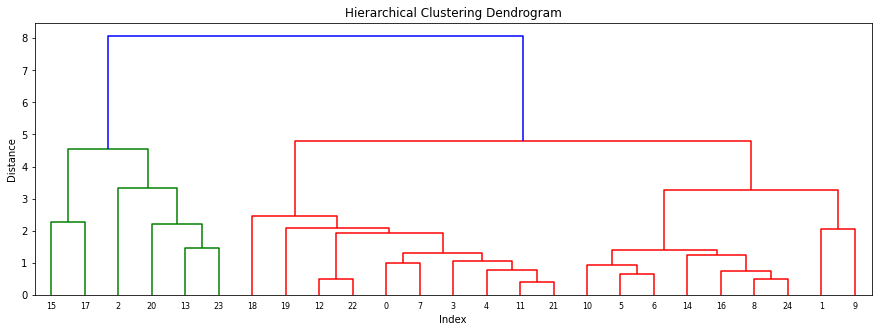

In [16]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [17]:
from	sklearn.cluster	import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=3,	linkage='complete',affinity = "euclidean").fit(df_norm) 

In [18]:
cluster_labels=pd.Series(h_complete.labels_)

In [19]:
Univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [20]:
# getting aggregate mean of each cluster
Univ.iloc[:,2:].groupby(Univ.clust).median()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1083.0,44.5,67.5,17.0,11021.0,71.5
1,1375.0,91.0,23.0,10.0,36450.0,95.0
2,1270.0,80.5,37.5,13.0,22284.0,90.0


In [22]:
# creating a csv file 
Univ.to_csv("University.csv",encoding="utf-8")
